# Лекция 10

## Линейная регрессия

### Задача: на основе наблюдаемых точек построить прямую, которая отображает связь между двумя или более переменными.
### Регрессия пытается "подогнать" функцию к наблюдаемым данным, чтобы спрогнозировать новые данны.
### Подгоняем данные к прямой линии, пытаемся установить линейную связь между переменными и предсказать новые данные

In [28]:
import numpy as np
from numpy import random
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [8]:
features, target = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=15, random_state=1)
print(features)
print(target)

[[-0.61175641]
 [-0.24937038]
 [ 0.48851815]
 [ 0.76201118]
 [ 1.51981682]
 [ 0.37756379]
 [ 0.51292982]
 [-0.67124613]
 [-1.39649634]
 [ 0.31563495]
 [-0.63699565]
 [-0.39675353]
 [-1.10061918]
 [ 0.90085595]
 [-1.09989127]
 [ 0.82797464]
 [-0.07557171]
 [-0.35224985]
 [-0.67066229]
 [-1.07296862]
 [-0.30620401]
 [ 2.18557541]
 [ 0.86540763]
 [ 0.19829972]
 [-0.38405435]
 [-0.68372786]
 [ 0.05080775]
 [ 0.58281521]
 [ 1.25286816]
 [-0.75439794]
 [-0.34934272]
 [-0.88762896]
 [ 0.18656139]
 [ 0.87616892]
 [ 0.83898341]
 [-0.50446586]
 [-0.34385368]
 [ 1.6924546 ]
 [-2.3015387 ]
 [ 0.93110208]
 [ 2.10025514]
 [ 1.46210794]
 [-0.84520564]
 [-0.87785842]
 [-0.3224172 ]
 [ 0.88514116]
 [ 0.16003707]
 [ 1.13162939]
 [-0.37528495]
 [ 0.50249434]
 [-0.20889423]
 [ 0.12015895]
 [ 0.58662319]
 [ 0.3190391 ]
 [-0.69166075]
 [ 0.69803203]
 [ 1.19891788]
 [-0.20075807]
 [ 0.53035547]
 [ 0.74204416]
 [ 0.41005165]
 [ 0.11900865]
 [-0.7612069 ]
 [ 0.42349435]
 [ 0.30017032]
 [-1.1425182 ]
 [ 0.18515

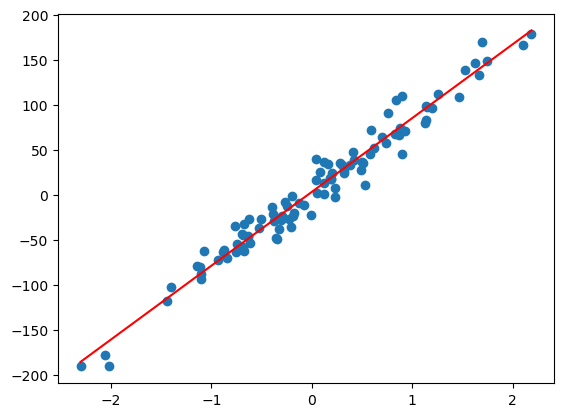

In [11]:
model = LinearRegression().fit(features, target)
plt.scatter(features, target)
x = np.linspace(features.min(), features.max(), 100)
# y = kx + b
plt.plot(x, model.coef_[0] * x + model.intercept_, color='red')

## Простая линейная регрессия

### Линейная -> линейная зависимость.

### + прогнозирование на новых данных
### + анализ взаимного влияния переменных друг на друга

### - точки обучаемых данных НЕ будут точно лежать на прямой (шум) => область погрешности
### - НЕ позволяет делать прогнозы вне диапазона имеющихся данных

### Данные, на основании которых разрабатывается модель, - это выборка из совокупности. Хотелось бы, чтобы это была РЕПРЕЗЕНТАТИВНАЯ выборка.

In [17]:
data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 14],
        [7, 17],
        [8, 19],
        [9, 22],
        [10, 28],
    ]
)
x = data[:, 0]
y = data[:, 1]

n = len(x)

w_1 = (n * sum(x[i] * y[i] for i in range(n)) - sum(x[i] for i in range(n)) * sum(y[i] for i in range(n))) / (n * sum(x[i] ** 2 for i in range(n)) - sum(x[i] for i in range(n)) ** 2)

w_0 = sum(y[i] for i in range(n)) / n - w_1 * sum(x[i] for i in range(n)) / n
print(w_1, w_0)

2.4 0.8000000000000007


In [18]:
x_1 = np.vstack([x, np.ones(len(x))]).T
w = inv(x_1.T @ x_1) @ (x_1.T @ y)
print(w)

[2.4 0.8]


In [19]:
Q, R = np.linalg.qr(x_1)
w = inv(R) @ Q.T @ y
print(w)

[2.4 0.8]


In [20]:
def f(x):
    return (x - 3) ** 2 + 4

In [24]:
def dx_f(x):
    return 2 * x - 6

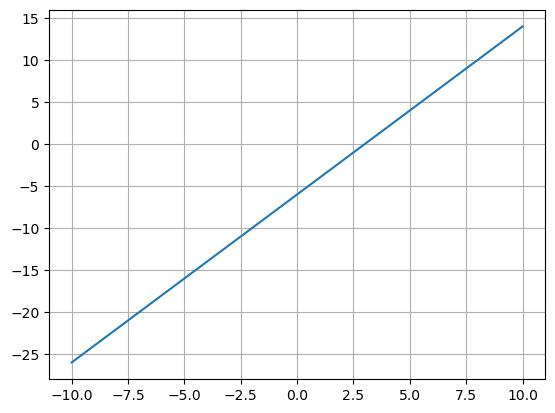

In [26]:
x = np.linspace(-10, 10, 100)
plt.grid()
plt.plot(x, dx_f(x))

In [29]:
L = 0.001
iterations = 100000
x = random.randint(0, 5)
for i in range(iterations):
    d_x = dx_f(x)
    x -= L * d_x
print(x, f(x))

2.999999999999889 4.0


In [42]:
data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 14],
        [7, 17],
        [8, 19],
        [9, 22],
        [10, 28],
    ]
)
x = data[:, 0]
y = data[:, 1]

n = len(x)

w_1 = 0
w_0 = 0

L = 0.001
iterations = 100000

for i in range(iterations):
    D_w0 = 2 * sum(-y[i] + w_0 + w_1 * x[i] for i in range(n))
    D_w1 = 2 * sum(x[i] * (-y[i] + w_0 + w_1 * x[i]) for i in range(n))
    w_1 -= L * D_w1
    w_0 -= L * D_w0
print(w_1, w_0)

2.4000000000000026 0.7999999999999835


In [34]:
def E(w1, w0, x, y):
    return sum((y[i] - (w0 + w1 * x[i])) ** 2 for i in range(len(x)))

In [41]:
w1 = np.linspace(-10, 10, 100)
w0 = np.linspace(-10, 10, 100)

W1, W0 = np.meshgrid(w1, w0)
EW = E(W1, W0, x, y)

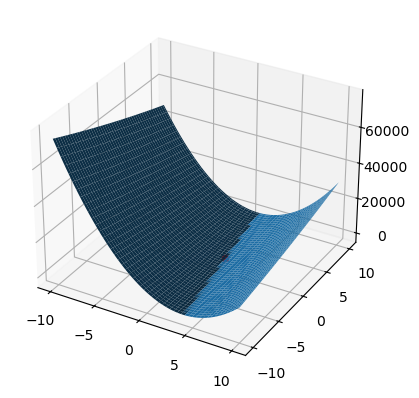

In [40]:
w1_fit = 2.4
w0_fit = 0.8

E_fit = E(w1_fit, w0_fit, x, y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(W1, W0, EW)
ax.scatter3D(w1_fit, w0_fit, E_fit, color='red')